In [ ]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
liverpool_15_16_data = pd.read_csv('./data/lesson-3.csv')
liverpool_15_16_data.head()

,points,coach,scored,allowed,xg,xga
0,3,Rodgers,1,0,0.70,0.11
1,3,Rodgers,1,0,1.26,0.43
2,1,Rodgers,0,0,1.69,1.23
3,0,Rodgers,0,3,0.11,1.15
4,0,Rodgers,1,3,1.64,1.45


In [5]:
by_coach = liverpool_15_16_data.groupby('coach').agg(['mean'])
by_coach

,points,scored,allowed,xg,xga
,mean,mean,mean,mean,mean
coach,,,,,
Klopp,1.444444,1.666667,1.444444,1.400556,1.116111
Rodgers,1.500000,1.000000,1.250000,1.406250,1.007500


In [37]:
klopp_data = liverpool_15_16_data[liverpool_15_16_data.coach == 'Klopp'].drop(['coach'], axis = 1)
rodgers_data = liverpool_15_16_data[liverpool_15_16_data.coach == 'Rodgers'].drop(['coach'], axis = 1)

print('Metric : P-value')
print('----------------')
for col in klopp_data.columns:
    print(col, ':', scipy.stats.ttest_ind(klopp_data[col], rodgers_data[col])[1])

Metric : P-value
points : 0.922499139411
scored : 0.346248750486
allowed : 0.711746162476
xg : 0.987435546886
xga : 0.768363110602


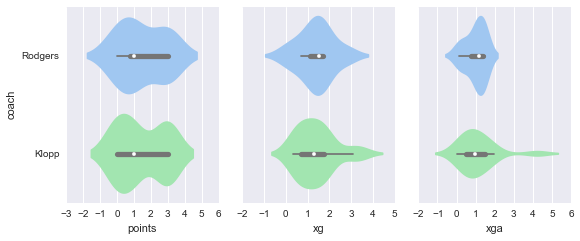

In [45]:
sns.PairGrid(liverpool_15_16_data, y_vars = ["coach"], x_vars = ["points", "xg", "xga"], 
             aspect = .75, size = 3.5).map(sns.violinplot, palette = "pastel")